In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from datasets import MaskedMNIST
from transformers import ViTImageProcessor, ViTModel

from torchvision import transforms
from torchvision.datasets import MNIST

In [2]:
data = MaskedMNIST(train=True)

In [3]:
masked, image, label = data[0]

5


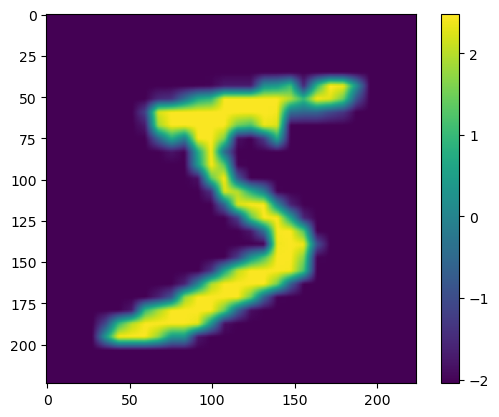

In [4]:
plt.imshow(image[0].numpy())
plt.colorbar()
print(label)

In [29]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_name = "fxmarty/resnet-tiny-mnist"
model = AutoModelForImageClassification.from_pretrained(model_name)
feature_extractor = AutoImageProcessor.from_pretrained(model_name)

normalize = transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
resize = transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR)
_transforms = transforms.Compose([transforms.ToTensor(), resize, normalize])
mnist = MNIST(root="./datasets", train=True,transform=_transforms, download=True)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [30]:
image, label = mnist[2]
label

4

In [31]:
image.shape

torch.Size([1, 224, 224])

In [32]:
#inputs = feature_extractor(images=image.squeeze(0), return_tensors="pt")
outputs = model(image)
print(outputs)
predictions = torch.argmax(outputs.logits, dim=1)
predictions
#plt.imshow(outputs)

ValueError: Make sure that the channel dimension of the pixel values match with the one set in the configuration.

In [6]:
processor = ViTImageProcessor.from_pretrained('farleyknight-org-username/vit-base-mnist')
model = ViTModel.from_pretrained('farleyknight-org-username/vit-base-mnist')
#inputs = processor(images=image, return_tensors="pt")

outputs = model(image)
last_hidden_states = outputs.last_hidden_state

Some weights of ViTModel were not initialized from the model checkpoint at farleyknight-org-username/vit-base-mnist and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: not enough values to unpack (expected 4, got 3)